# Avaliação das previsões geradas pelo modelo ARIMA 

Neste trabalho é avaliada a performance do modelo ARIMA para a previsão da média de casos de 7 dias utilizando dados fora do período de treino do modelo. No trabalho anterior foram testadas modelos AR e MA, mas, como o ARIMa teve desempenho melhor na maioria dos países ele foi o selecionado para prosseguir nesta fase do projeto.

## Bibliotecas necessárias

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
dir_covid_data = '../../datalake/silver/covid_data/'
covid_file = f'{dir_covid_data}/full_grouped_filtro_1.csv'
covid_data = pd.read_csv(covid_file)
covid_data.drop('Unnamed: 0', axis=1, inplace=True)
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.set_index('Date', inplace=True)

# Dados necessários para o ARIMA
reg_data = covid_data[['Country/Region', 'New cases']].dropna() # Remoção de valores NaN

Função para gerar previsões com o modelo ARIMA

In [118]:
def arima_model(train_data, test_data, p=0, d=0, q=0, country='', model_name='',
                horizon=1):
    model = ARIMA(train_data['New cases'], order=(p, d, q))
    model = model.fit()
    fcst = []
    data = train_data.copy()

    for i in range(len(test_data)):
        fcst.append([data.index[-1], *model.forecast(horizon).values[:]])
        data = pd.concat([data, test_data.iloc[i:i+1]])
        model_test = ARIMA(data['New cases'], order=(p, d, q))
        model = model_test.smooth(model.params)

    fcst = pd.DataFrame(fcst)
    fcst.columns = ['fcst_date', *[f'h{i}' for i in range(1, horizon+1)]]
    fcst.set_index('fcst_date', inplace=True)
    fcst['7day_average'] = fcst.mean(axis=1)
    data_fcst = data.loc[fcst.index].rolling(horizon).mean().shift(-horizon).dropna()
    fig, ax = plt.subplots(1)
    fcst.loc[data_fcst.index]['7day_average'].plot(ax=ax, label='forecast')
    data_fcst.plot(ax=ax)
    plt.legend()
    fcst = fcst.loc[data_fcst.index]
    fcst['7day_average_observed'] = data_fcst
    return fcst
    

## Gerando Previsões

### Argentina

In [119]:
reg_data_ar = reg_data[reg_data['Country/Region'] == 'Argentina']
reg_data_ar = reg_data_ar[['New cases']]
reg_data_ar = reg_data_ar.loc[reg_data_ar.ne(0).idxmax()[0]:]
train_data = reg_data_ar.iloc[:103]
test_data = reg_data_ar.iloc[103:]

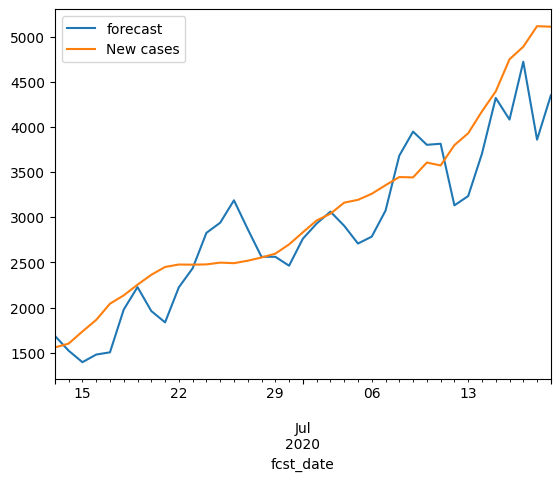

In [122]:
fcst_ar = arima_model(train_data, test_data, p=3, d=2, q=1, model_name='ARIMA', country='Argentina', horizon=7)

In [89]:
model = ARIMA(train_data['New cases'], order=(3, 2, 1))
model = model.fit()
fcst = []
data = train_data.copy()
pred = model.predict(start=0, end=len(train_data['New cases'])-1)

for i in range(len(test_data)):
    fcst.append([data.index[-1], *model.forecast(7).values[:]])
    data = pd.concat([data, test_data.iloc[i:i+1]])
    model_test = ARIMA(data['New cases'], order=(3, 2, 1))
    model = model_test.smooth(model.params)

fcst = pd.DataFrame(fcst)
fcst.columns = ['fcst_date', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7']
fcst.set_index('fcst_date', inplace=True)
fcst['7day_average'] = fcst.mean(axis=1)

In [101]:
data_fcst = data.loc[fcst.index].rolling(7).mean().shift(-7).dropna()

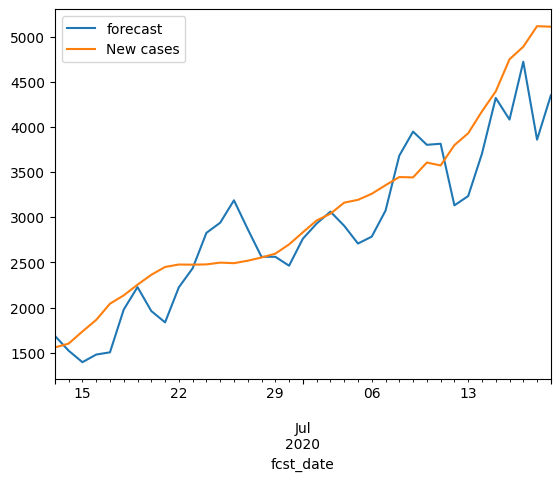

In [106]:
fig, ax = plt.subplots(1)
fcst.loc[data_fcst.index]['7day_average'].plot(ax=ax, label='forecast')
data_fcst.plot(ax=ax)
plt.legend()

### México

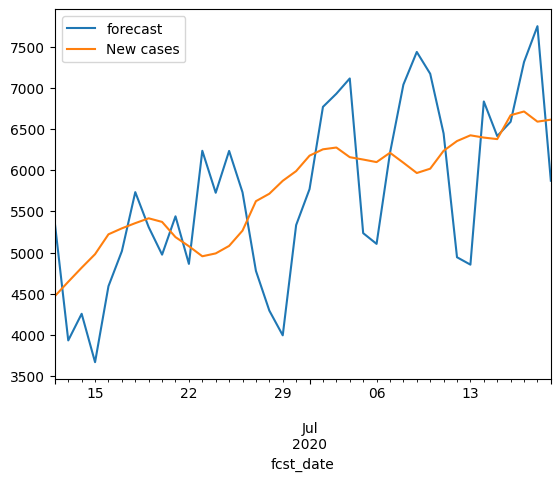

In [113]:
reg_data_mx = reg_data[reg_data['Country/Region'] == 'Mexico']
reg_data_mx = reg_data_mx[['New cases']]
reg_data_mx = reg_data_mx.loc[reg_data_mx.ne(0).idxmax()[0]:]
train_data = reg_data_mx.iloc[:106]
test_data = reg_data_mx.iloc[106:]
fcst_mx = arima_model(train_data, test_data, p=2, d=2, q=1, model_name='ARIMA', country='México', horizon=7)

### Chile

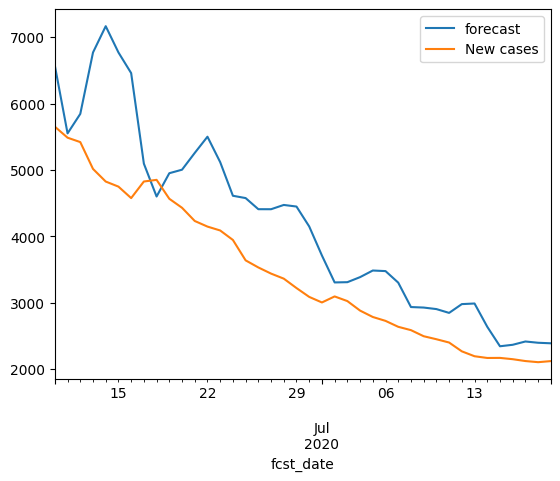

In [114]:
reg_data_ch = reg_data[reg_data['Country/Region'] == 'Chile']
reg_data_ch = reg_data_ch[['New cases']]
reg_data_ch = reg_data_ch.loc[reg_data_ch.ne(0).idxmax()[0]:]
train_data = reg_data_ch.iloc[:109]
test_data = reg_data_ch.iloc[109:]
fcst_ch = arima_model(train_data, test_data, p=4, d=2, q=1, model_name='ARIMA', country='Chile', horizon=7)

### Equador

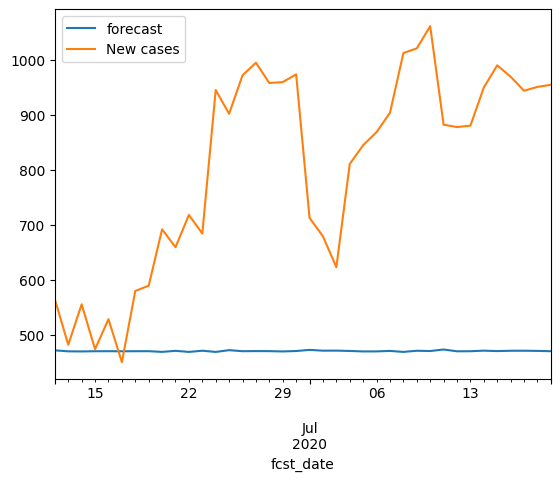

In [115]:
reg_data_eq = reg_data[reg_data['Country/Region'] == 'Ecuador']
reg_data_eq = reg_data_eq[['New cases']]
reg_data_eq = reg_data_eq.loc[reg_data_eq.ne(0).idxmax()[0]:]
train_data = reg_data_eq.iloc[:104]
test_data = reg_data_eq.iloc[104:]
fcst_eq = arima_model(train_data, test_data, p=1, q=1, model_name='ARIMA', country='Equador', horizon=7)


### Espanha

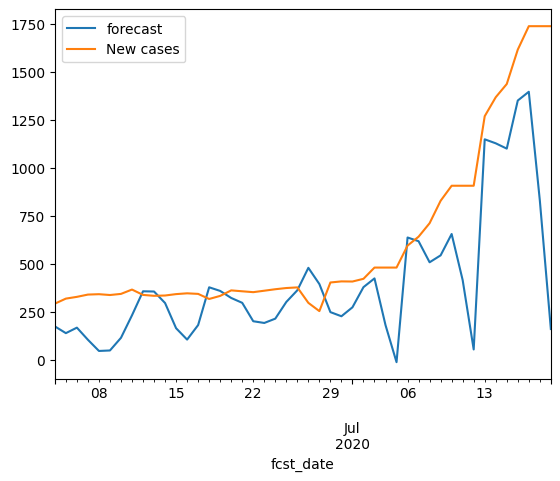

In [125]:
reg_data_es = reg_data[reg_data['Country/Region'] == 'Spain']
reg_data_es = reg_data_es[['New cases']]
reg_data_es = reg_data_es.loc[reg_data_es.ne(0).idxmax()[0]:]
train_data = reg_data_es.iloc[:125]
test_data = reg_data_es.iloc[125:]
fcst_es = arima_model(train_data, test_data, p=3, d=2, q=2, model_name='ARIMA', country='Espanha', horizon=7)